<a href="https://colab.research.google.com/github/AdityaRaorane22/AIDS_LAB_01-34-44-/blob/main/exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset


In [2]:
import pandas as pd

df = pd.read_csv("/content/Electric_Vehicle_Registration_Data.csv")
df.head()


,ID,Plate Type,Primary Customer City,Primary Customer State,Registration Start Date,Registration Expiration Date,Registration Usage,Vehicle Type,Vehicle Weight,Vehicle Year,Vehicle Make,Vehicle Model,Vehicle Body,Primary Color,Vehicle Declared Gross Weight,Fuel Code,Vehicle Recorded GVWR,Vehicle Name,Type,Vehicle Category
0,429342,Motorcycle,LEDYARD,CT,09/20/2022,09/19/2025,Regular,Motorcycle,0,2021,ZIGGY,G5,MC,Gray,0,E00,0,ZIGGY,BEMC,Light-Duty (Class 1-2)
1,2641353,Passenger,NORWALK,CT,01/04/2024,01/03/2027,Regular,Passenger,0,2024,Polestar,2,4D,Gray,0,E00,0,Polestar 2,BEV,Light-Duty (Class 1-2)
2,2763182,Passenger,MERIDEN,CT,04/10/2024,04/09/2027,Regular,Passenger,0,2024,BMW,I5 M60,SD,Gray,0,E00,0,BMW I5 M60,BEV,Light-Duty (Class 1-2)
3,2763182,Passenger,MERIDEN,CT,04/10/2024,04/09/2027,Regular,Passenger,0,2024,BMW,I5 M60,SD,Gray,0,E00,0,BMW i5,BEV,Light-Duty (Class 1-2)
4,93,Passenger,GREENWICH,CT,08/19/2021,08/18/2024,Regular,Passenger,0,2021,Tesla,Model S,4D,Gray,0,E00,0,Tesla Model S,BEV,Light-Duty (Class 1-2)


#Analyzing its dimensions

In [3]:
df.shape

(52691, 20)

In [4]:
print('datadet info')
df.info()
print('\ndataset description')
df.describe()

datadet info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52691 entries, 0 to 52690
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             52691 non-null  int64 
 1   Plate Type                     52691 non-null  object
 2   Primary Customer City          52657 non-null  object
 3   Primary Customer State         52657 non-null  object
 4   Registration Start Date        52691 non-null  object
 5   Registration Expiration Date   52691 non-null  object
 6   Registration Usage             52691 non-null  object
 7   Vehicle Type                   52691 non-null  object
 8   Vehicle Weight                 52691 non-null  int64 
 9   Vehicle Year                   52691 non-null  int64 
 10  Vehicle Make                   52691 non-null  object
 11  Vehicle Model                  52691 non-null  object
 12  Vehicle Body                   52691 non-null  

,ID,Vehicle Weight,Vehicle Year,Vehicle Declared Gross Weight,Vehicle Recorded GVWR
count,5.269100e+04,52691.000000,52691.000000,5.269100e+04,52691.000000
mean,1.541024e+06,662.548633,2021.632119,6.362825e+05,806.937466
std,1.039725e+06,2127.894845,2.471569,1.643281e+06,2300.669623
min,9.300000e+01,0.000000,1998.000000,0.000000e+00,0.000000
25%,5.487550e+05,0.000000,2021.000000,0.000000e+00,0.000000
50%,1.673766e+06,0.000000,2022.000000,0.000000e+00,0.000000
75%,2.613891e+06,0.000000,2023.000000,0.000000e+00,0.000000
max,2.934513e+06,80000.000000,2025.000000,7.214477e+06,80000.000000


#To check null values and remove maximum missing values

In [5]:
df.isnull().sum()

,0
ID,0
Plate Type,0
Primary Customer City,34
Primary Customer State,34
Registration Start Date,0
Registration Expiration Date,0
Registration Usage,0
Vehicle Type,0
Vehicle Weight,0
Vehicle Year,0


In [34]:
df.replace(0, pd.NA, inplace=True)
df_cleaned = df.dropna()
print(df_cleaned.isna().sum())

Plate Type                   0
Primary Customer City        0
Registration Usage           0
Vehicle Type                 0
Vehicle Weight               0
Primary Color                0
Vehicle Category             0
Z_Score                      0
Vehicle Weight Normalized    0
dtype: int64


In [35]:
df = df_cleaned.drop_duplicates()
df.head()


,Plate Type,Primary Customer City,Registration Usage,Vehicle Type,Vehicle Weight,Primary Color,Vehicle Category,Z_Score,Vehicle Weight Normalized
71,Passenger,SOUTHINGTON,Regular,SUV,5530,Gray,Light-Duty (Class 1-2),-0.047744,0.376398
233,Passenger,GLASTONBURY,Regular,SUV,4774,Gray,Light-Duty (Class 1-2),-0.533065,0.282484
276,Passenger,WALLINGFORD,Regular,Passenger,5200,Black,Light-Duty (Class 1-2),-0.25959,0.335404
279,Passenger,WILLIMANTIC,Regular,Passenger,4200,Black,Light-Duty (Class 1-2),-0.901549,0.21118
337,Passenger,WINDSOR,Regular,SUV,4800,Gray,Light-Duty (Class 1-2),-0.516374,0.285714


In [11]:
df.shape

(678, 20)

#Dropping unnecessary features

In [15]:
df.drop(['ID', 'Primary Customer State', 'Registration Start Date', 'Registration Expiration Date',
         'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Vehicle Body',
         'Vehicle Declared Gross Weight', 'Fuel Code', 'Vehicle Recorded GVWR',
         'Vehicle Name', 'Type'], axis=1, inplace=True)


<ipython-input-15-0142c389702f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ID', 'Primary Customer State', 'Registration Start Date', 'Registration Expiration Date',


#Creating a dummy variable for primary color

In [23]:
df_dummies = pd.get_dummies(df, columns=['Plate Type'], drop_first=True)
print(df_dummies)

      Primary Customer City Registration Usage Vehicle Type Vehicle Weight  \
71              SOUTHINGTON            Regular          SUV           5530   
233             GLASTONBURY            Regular          SUV           4774   
276             WALLINGFORD            Regular    Passenger           5200   
279             WILLIMANTIC            Regular    Passenger           4200   
337                 WINDSOR            Regular          SUV           4800   
...                     ...                ...          ...            ...   
52470                WESTON            Regular        Truck           8450   
52609               PRESTON            Regular        Truck           8000   
52648                GOSHEN            Regular          SUV           6450   
52670             STRATFORD            Regular        Truck           8250   
52684             WOODSTOCK            Regular    Passenger           5300   

      Primary Color        Vehicle Category  Plate Type_Commerc

#Detect outliers manually

In [24]:
df.head(10)

,Plate Type,Primary Customer City,Registration Usage,Vehicle Type,Vehicle Weight,Primary Color,Vehicle Category
71,Passenger,SOUTHINGTON,Regular,SUV,5530,Gray,Light-Duty (Class 1-2)
233,Passenger,GLASTONBURY,Regular,SUV,4774,Gray,Light-Duty (Class 1-2)
276,Passenger,WALLINGFORD,Regular,Passenger,5200,Black,Light-Duty (Class 1-2)
279,Passenger,WILLIMANTIC,Regular,Passenger,4200,Black,Light-Duty (Class 1-2)
337,Passenger,WINDSOR,Regular,SUV,4800,Gray,Light-Duty (Class 1-2)
416,Passenger,BRISTOL,Regular,SUV,5530,Silver,Light-Duty (Class 1-2)
420,Passenger,WEST SIMSBURY,Regular,Passenger,5600,Blue,Light-Duty (Class 1-2)
616,Passenger,NEW HAVEN,Regular,Passenger,3840,Black,Light-Duty (Class 1-2)
782,Passenger,GLASTONBURY,Regular,SUV,4800,Silver,Light-Duty (Class 1-2)
857,Passenger,GUILFORD,Regular,SUV,4709,Red,Light-Duty (Class 1-2)


In [27]:
#By Z-score method
mean_vehicle_weight = df['Vehicle Weight'].mean()
std_vehicle_weight = df['Vehicle Weight'].std()

print(f"Mean of Vehicle Weight: {mean_vehicle_weight}")
print(f"Standard Deviation of Vehicle Weight: {std_vehicle_weight}")

# Calculate the Z-score for each vehicle weight
df['Z_Score'] = (df['Vehicle Weight'] - mean_vehicle_weight) / std_vehicle_weight

print(df[['Vehicle Weight', 'Z_Score']])

# Identify outliers based on the Z-score
outliers = df[df['Z_Score'].abs() > 3]
print(outliers)



Mean of Vehicle Weight: 5604.371681415929
Standard Deviation of Vehicle Weight: 1557.7315042063165
      Vehicle Weight   Z_Score
71              5530 -0.047744
233             4774 -0.533065
276             5200  -0.25959
279             4200 -0.901549
337             4800 -0.516374
...              ...       ...
52470           8450  1.826777
52609           8000  1.537896
52648           6450  0.542859
52670           8250  1.698385
52684           5300 -0.195394

[678 rows x 2 columns]
        Plate Type Primary Customer City Registration Usage Vehicle Type  \
15639  Combination             THOMASTON        Combination          SUV   
23230  Combination             FAIRFIELD        Combination        Truck   
32996  Combination           WILLIMANTIC        Combination          Van   
50047  Combination               WINDSOR        Combination        Truck   

      Vehicle Weight Primary Color         Vehicle Category   Z_Score  
15639          10550         White   Light-Duty (Cla

<ipython-input-27-7159e77ccc4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z_Score'] = (df['Vehicle Weight'] - mean_vehicle_weight) / std_vehicle_weight


#Normalization

In [28]:
# Min-Max Normalization
min_vehicle_weight = df['Vehicle Weight'].min()
max_vehicle_weight = df['Vehicle Weight'].max()

# Apply normalization
df['Vehicle Weight Normalized'] = (df['Vehicle Weight'] - min_vehicle_weight) / (max_vehicle_weight - min_vehicle_weight)

print(df[['Vehicle Weight', 'Vehicle Weight Normalized']])


      Vehicle Weight Vehicle Weight Normalized
71              5530                  0.376398
233             4774                  0.282484
276             5200                  0.335404
279             4200                   0.21118
337             4800                  0.285714
...              ...                       ...
52470           8450                   0.73913
52609           8000                   0.68323
52648           6450                  0.490683
52670           8250                  0.714286
52684           5300                  0.347826

[678 rows x 2 columns]


<ipython-input-28-6dea2ada1378>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle Weight Normalized'] = (df['Vehicle Weight'] - min_vehicle_weight) / (max_vehicle_weight - min_vehicle_weight)


In [38]:
print("The first 10 rows of normalized data are :")
df.head(10)

The first 10 rows of normalized data are :


,Plate Type,Primary Customer City,Registration Usage,Vehicle Type,Vehicle Weight,Primary Color,Vehicle Category,Z_Score,Vehicle Weight Normalized
71,Passenger,SOUTHINGTON,Regular,SUV,5530,Gray,Light-Duty (Class 1-2),-0.047744,0.376398
233,Passenger,GLASTONBURY,Regular,SUV,4774,Gray,Light-Duty (Class 1-2),-0.533065,0.282484
276,Passenger,WALLINGFORD,Regular,Passenger,5200,Black,Light-Duty (Class 1-2),-0.25959,0.335404
279,Passenger,WILLIMANTIC,Regular,Passenger,4200,Black,Light-Duty (Class 1-2),-0.901549,0.21118
337,Passenger,WINDSOR,Regular,SUV,4800,Gray,Light-Duty (Class 1-2),-0.516374,0.285714
416,Passenger,BRISTOL,Regular,SUV,5530,Silver,Light-Duty (Class 1-2),-0.047744,0.376398
420,Passenger,WEST SIMSBURY,Regular,Passenger,5600,Blue,Light-Duty (Class 1-2),-0.002806,0.385093
616,Passenger,NEW HAVEN,Regular,Passenger,3840,Black,Light-Duty (Class 1-2),-1.132655,0.16646
782,Passenger,GLASTONBURY,Regular,SUV,4800,Silver,Light-Duty (Class 1-2),-0.516374,0.285714
857,Passenger,GUILFORD,Regular,SUV,4709,Red,Light-Duty (Class 1-2),-0.574792,0.27441


In [31]:
df.to_csv('C:\\Users\\adity\\Desktop\\VESIT_Notes\\AIDS LAB1\\normalized_vehicle_data.csv', index=False)

##EXPT_02

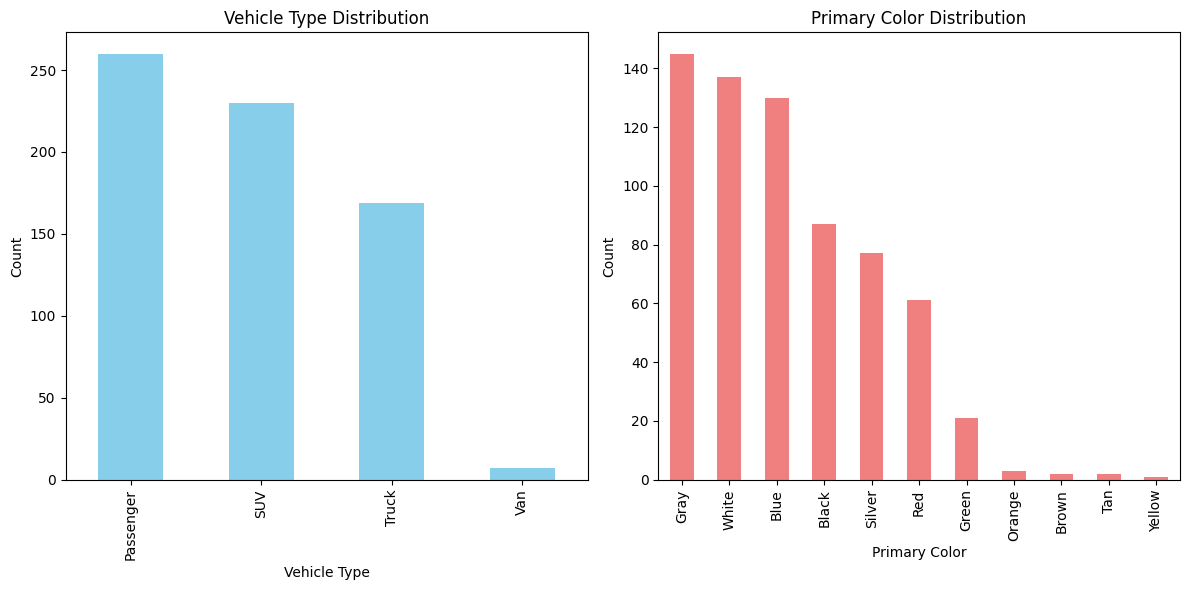

In [39]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'Vehicle Type' and 'Primary Color'
vehicle_type_counts = df['Vehicle Type'].value_counts()
color_counts = df['Primary Color'].value_counts()

# Create bar graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
vehicle_type_counts.plot(kind='bar', color='skyblue')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
color_counts.plot(kind='bar', color='lightcoral')
plt.title('Primary Color Distribution')
plt.xlabel('Primary Color')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [40]:
# Create a contingency table for 'Vehicle Type' and 'Primary Color'
contingency_table = pd.crosstab(df['Vehicle Type'], df['Primary Color'])
print(contingency_table)


Primary Color  Black  Blue  Brown  Gray  Green  Orange  Red  Silver  Tan  \
Vehicle Type                                                               
Passenger         38    44      1    62      3       1   32      30    1   
SUV               27    51      1    46      4       1   18      24    1   
Truck             22    34      0    37     14       0    9      23    0   
Van                0     1      0     0      0       1    2       0    0   

Primary Color  White  Yellow  
Vehicle Type                  
Passenger         48       0  
SUV               57       0  
Truck             29       1  
Van                3       0  


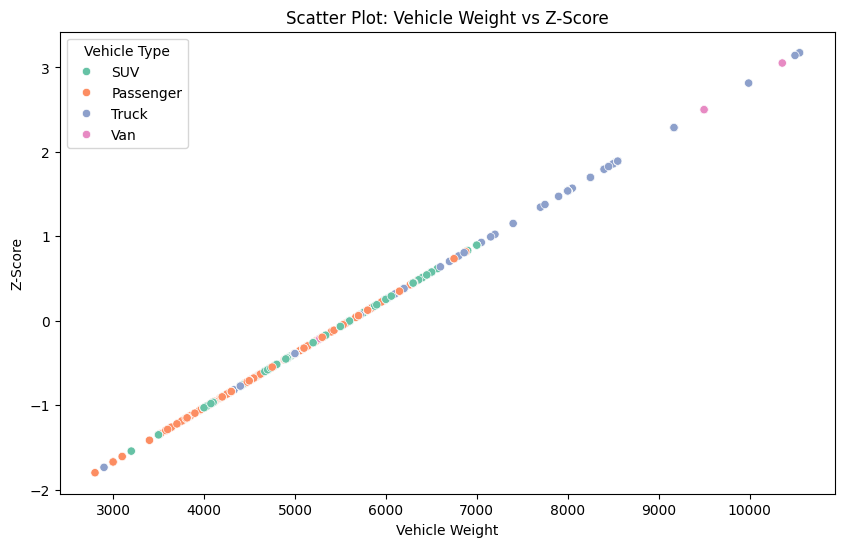

In [41]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle Weight', y='Z_Score', data=df, hue='Vehicle Type', palette='Set2')
plt.title('Scatter Plot: Vehicle Weight vs Z-Score')
plt.xlabel('Vehicle Weight')
plt.ylabel('Z-Score')
plt.show()


<ipython-input-42-dd532d0fa891>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle Type', y='Vehicle Weight', data=df, palette='Set1')


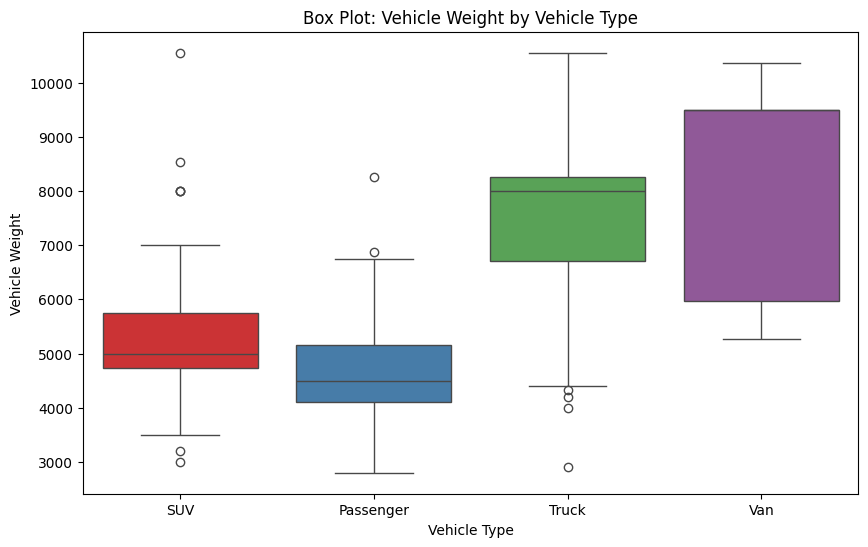

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Type', y='Vehicle Weight', data=df, palette='Set1')
plt.title('Box Plot: Vehicle Weight by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Vehicle Weight')
plt.show()


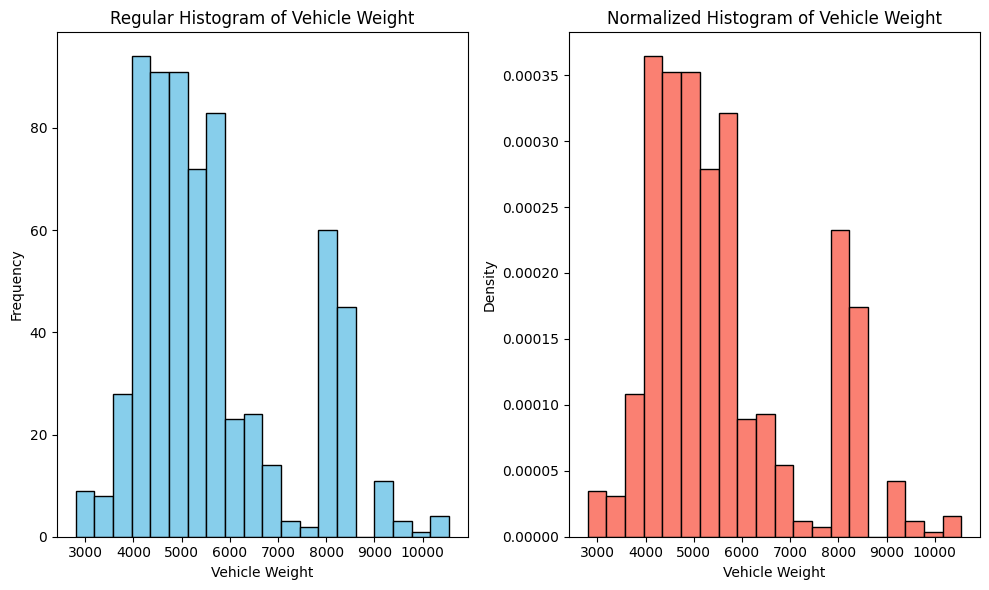

In [53]:
# Plotting the Regular Histogram
plt.figure(figsize=(10, 6))

# Regular Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Vehicle Weight'], bins=20, color='skyblue', edgecolor='black')
plt.title('Regular Histogram of Vehicle Weight')
plt.xlabel('Vehicle Weight')
plt.ylabel('Frequency')

# Plotting the Normalized Histogram
plt.subplot(1, 2, 2)
plt.hist(df['Vehicle Weight'], bins=20, color='salmon', edgecolor='black', density=True)
plt.title('Normalized Histogram of Vehicle Weight')
plt.xlabel('Vehicle Weight')
plt.ylabel('Density')

# Show both histograms
plt.tight_layout()
plt.show()

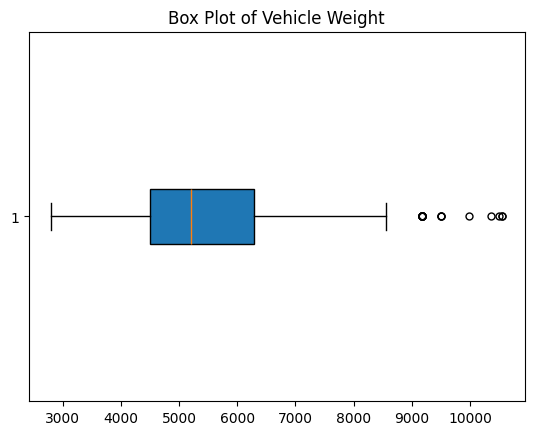

Original shape: (666, 10), New shape (no outliers): (647, 10)


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the box plot to identify outliers
plt.boxplot(df['Vehicle Weight'], vert=False, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Box Plot of Vehicle Weight')
plt.show()

# Calculate IQR and identify outliers
Q1, Q3 = df['Vehicle Weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Vehicle Weight'] >= lower_bound) & (df['Vehicle Weight'] <= upper_bound)]

# Display results
print(f"Original shape: {df.shape}, New shape (no outliers): {df_no_outliers.shape}")


#Expt_03

In [56]:
from sklearn.model_selection import train_test_split

# Partition the data: 75% for training and 25% for testing
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Display the shape of the data sets
print(f"Training Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Training Data Shape: (499, 10)
Test Data Shape: (167, 10)


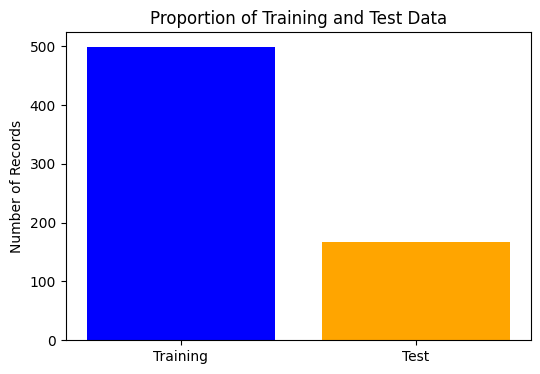

In [57]:
# Bar plot for proportions of training and test data
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Test'], [len(train_df), len(test_df)], color=['blue', 'orange'])
plt.title('Proportion of Training and Test Data')
plt.ylabel('Number of Records')
plt.show()

In [58]:
# Print the total number of records in the training data set
print(f"Total records in the training data set: {len(train_df)}")


Total records in the training data set: 499


In [59]:
from statsmodels.stats.weightstats import ztest

# Perform Z-test for 'Vehicle Weight' between training and test datasets
train_weight = train_df['Vehicle Weight']
test_weight = test_df['Vehicle Weight']

# Z-test for independent samples
z_stat, p_val = ztest(train_weight, test_weight)

# Display Z-test results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Interpret the result
if p_val < 0.05:
    print("There is a significant difference between the training and test data for Vehicle Weight.")
else:
    print("There is no significant difference between the training and test data for Vehicle Weight.")


Z-statistic: -2.425627418979989
P-value: 0.015281950139779434
There is a significant difference between the training and test data for Vehicle Weight.
